<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in New York City</font></h1>

## Introduction

In this project, we are trying to find the best location options to open a new resturant in New York city. The neighborhoods are analyzed to find out the best ones for a new resturant depending on the type, budget and geographical limitations of the resturant. The factors that would be taken into considerations while selecting the suitable neighborhoods are median age, median income, population of the neigbhorhood along with the number of resturants(Venues), resturant category (American, Italian, etc) and their locations which will be obtained using the Foursquare API. Further, K-means clustering will be used to complete the analysis and Folium visualization to visualize the emerging clusters.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries imported.')

Libraries imported.


In [2]:
data= pd.read_csv("NY_data.csv")


## 1. Data preprocessing

In [3]:
# instantiate the dataframe
NY_data = pd.DataFrame(data)
NY_data.head()

,Borough,Ncode,Neighborhood,Latitude,Longitude,population density,population total,male,female,Median income,Median age
0,Brooklyn,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,497498.701,48351,23370,24981,1520979,36.8
1,Brooklyn,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,40.577914,-73.943537,589296.926,61584,28670,32914,1054259,40.3
2,Brooklyn,BK61,Crown Heights North,40.670829,-73.943291,1506628.840,100130,44442,55688,980637,34.6
3,Brooklyn,BK90,East Williamsburg,40.708492,-73.938858,468975.876,33155,15587,17568,519058,34.1
4,Queens,QN23,College Point,40.784903,-73.843045,125384.135,24199,12281,11918,354073,38.7


In [4]:
NY_data.dropna()

,Borough,Ncode,Neighborhood,Latitude,Longitude,population density,population total,male,female,Median income,Median age
0,Brooklyn,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,4.974987e+05,48351,23370,24981,1520979,36.8
1,Brooklyn,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,40.577914,-73.943537,5.892969e+05,61584,28670,32914,1054259,40.3
2,Brooklyn,BK61,Crown Heights North,40.670829,-73.943291,1.506629e+06,100130,44442,55688,980637,34.6
3,Brooklyn,BK90,East Williamsburg,40.708492,-73.938858,4.689759e+05,33155,15587,17568,519058,34.1
4,Queens,QN23,College Point,40.784903,-73.843045,1.253841e+05,24199,12281,11918,354073,38.7
5,Staten Island,SI11,Charleston-Richmond Valley-Tottenville,40.530531,-74.232158,2.310691e+04,24083,12491,11592,342708,39.5
6,Queens,QN45,Douglas Manor-Douglaston-Little Neck,40.766846,-73.742498,6.212254e+04,25619,12681,12938,554014,45.4
7,Staten Island,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,40.538114,-74.178549,5.372342e+04,28727,14589,14138,521048,43.1
8,Staten Island,SI54,Great Kills,40.549480,-74.149324,1.153185e+05,43427,21259,22168,718593,43.2
9,Bronx,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.819014,-73.848027,4.551227e+05,53800,23977,29823,490852,34.6


In [5]:
#Male-female population not required
NY_data=NY_data.drop(['female'],axis=1)
NY_data=NY_data.drop(['male'],axis=1)
NY_data=NY_data.drop(['population density'],axis=1)

In [6]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(NY_data['Borough'].unique()),
        NY_data.shape[0]
    )
)

The dataframe has 5 boroughs and 172 neighborhoods.


In [7]:
NY_data.head()

,Borough,Ncode,Neighborhood,Latitude,Longitude,population total,Median income,Median age
0,Brooklyn,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,48351,1520979,36.8
1,Brooklyn,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,40.577914,-73.943537,61584,1054259,40.3
2,Brooklyn,BK61,Crown Heights North,40.670829,-73.943291,100130,980637,34.6
3,Brooklyn,BK90,East Williamsburg,40.708492,-73.938858,33155,519058,34.1
4,Queens,QN23,College Point,40.784903,-73.843045,24199,354073,38.7


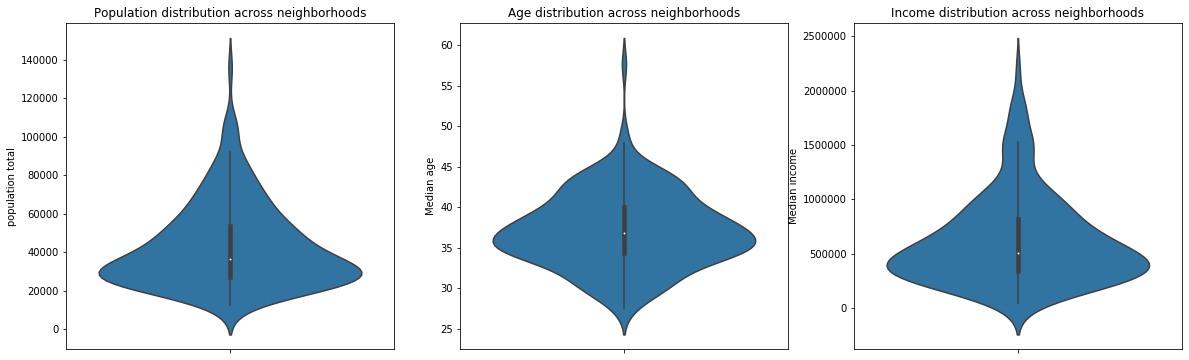

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("Population distribution across neighborhoods")
sns.axes_style("dark")
sns.violinplot(y=NY_data["population total"])
plt.subplot(1,3,2)
plt.title("Age distribution across neighborhoods")
sns.axes_style("dark")
sns.violinplot(y=NY_data["Median age"])
plt.subplot(1,3,3)
plt.title("Income distribution across neighborhoods")
sns.axes_style("dark")
sns.violinplot(y=NY_data["Median income"])
plt.show()

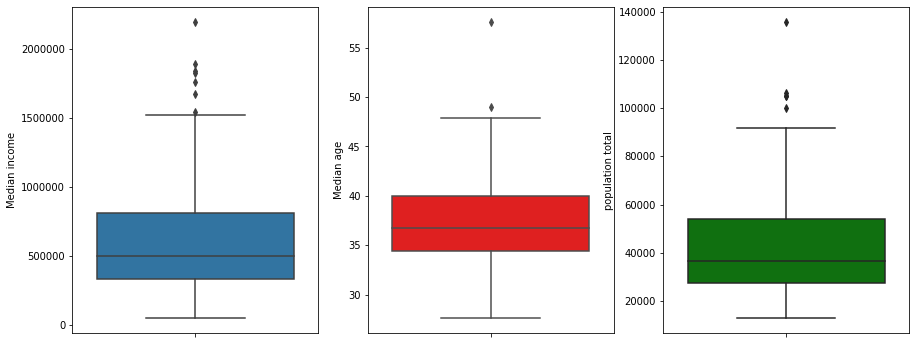

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y=NY_data["Median income"])
plt.subplot(1,3,2)
sns.boxplot(y=NY_data["Median age"], color="red")
plt.subplot(1,3,3)
sns.boxplot(y=NY_data["population total"], color="green")
plt.show()

#### Use geopy library to get the latitude and longitude values of New York City.

In [10]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(NY_data['Latitude'], NY_data['Longitude'], NY_data['Borough'], NY_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### Define Foursquare Credentials and Version

In [12]:
CLIENT_ID = 'YEX3ATLEGEIBBM3ZO0ECZC2ODYFXVUTAFPQMAOOHMKIMFQ3D' # your Foursquare ID
CLIENT_SECRET = 'FVUN2SBP5V3PCAUQA13ZX4CCOZL2DPILZJ3KAIWIWPKSLBG5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YEX3ATLEGEIBBM3ZO0ECZC2ODYFXVUTAFPQMAOOHMKIMFQ3D
CLIENT_SECRET:FVUN2SBP5V3PCAUQA13ZX4CCOZL2DPILZJ3KAIWIWPKSLBG5


## 2. Explore Neighborhoods in all 5 Boroughs

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
# type your answer here

all_venues = getNearbyVenues(names=NY_data['Neighborhood'],
                                   latitudes=NY_data['Latitude'],
                                   longitudes=NY_data['Longitude']
                                  )



Georgetown-Marine Park-Bergen Beach-Mill Basin
Sheepshead Bay-Gerritsen Beach-Manhattan Beach
Crown Heights North
East Williamsburg
College Point
Charleston-Richmond Valley-Tottenville
Douglas Manor-Douglaston-Little Neck
Annadale-Huguenot-Prince's Bay-Eltingville
Great Kills
Soundview-Castle Hill-Clason Point-Harding Park
Rosedale
Pelham Bay-Country Club-City Island
Hunts Point
Seagate-Coney Island
Far Rockaway-Bayswater
Schuylerville-Throgs Neck-Edgewater Park
Whitestone
Springfield Gardens North
West Brighton
Prospect Lefferts Gardens-Wingate
Battery Park City-Lower Manhattan
Starrett City
Hammels-Arverne-Edgemere
East New York
West New Brighton-New Brighton-St. George
Lindenwood-Howard Beach
Westerleigh
Pomonok-Flushing Heights-Hillcrest
Marble Hill-Inwood
Mariner's Harbor-Arlington-Port Ivory-Graniteville
Homecrest
Fort Greene
Grymes Hill-Clifton-Fox Hills
Central Harlem South
Crown Heights South
Bronxdale
Fordham South
Corona
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel


In [37]:
print(all_venues.shape)
all_venues.head(3)


(3848, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,Duane Reade,40.622544,-73.917005,Pharmacy
1,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,Fairway Market Georgetown,40.626150,-73.915848,Supermarket
2,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,Dunkin',40.621356,-73.916896,Donut Shop


In [39]:
# Extracting the rows with Venue Category as a Restaurant
resturants = all_venues.loc[all_venues['Venue Category'].str.contains('Restaurant') == True]
resturants.head(3)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
5,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,Landi's Pork Store,40.619633,-73.917918,Italian Restaurant
6,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,Chipotle Mexican Grill,40.626405,-73.916976,Mexican Restaurant
7,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,Gourmet Grill,40.619543,-73.916111,American Restaurant


In [17]:
df=resturants.set_index(["Neighborhood", "Venue Category"]).count(level="Neighborhood")
df

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Neighborhood,,,,,
Allerton-Pelham Gardens,4,4,4,4,4
Annadale-Huguenot-Prince's Bay-Eltingville,2,2,2,2,2
Astoria,13,13,13,13,13
Auburndale,5,5,5,5,5
Baisley Park,4,4,4,4,4
Bath Beach,13,13,13,13,13
Battery Park City-Lower Manhattan,1,1,1,1,1
Bay Ridge,8,8,8,8,8
Bayside-Bayside Hills,9,9,9,9,9


In [18]:
combined = pd.merge(NY_data,
                 df["Venue"],
                 on="Neighborhood",how ='left')
combined


,Borough,Ncode,Neighborhood,Latitude,Longitude,population total,Median income,Median age,Venue
0,Brooklyn,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,48351,1520979,36.8,4.0
1,Brooklyn,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,40.577914,-73.943537,61584,1054259,40.3,NaN
2,Brooklyn,BK61,Crown Heights North,40.670829,-73.943291,100130,980637,34.6,1.0
3,Brooklyn,BK90,East Williamsburg,40.708492,-73.938858,33155,519058,34.1,2.0
4,Queens,QN23,College Point,40.784903,-73.843045,24199,354073,38.7,8.0
5,Staten Island,SI11,Charleston-Richmond Valley-Tottenville,40.530531,-74.232158,24083,342708,39.5,2.0
6,Queens,QN45,Douglas Manor-Douglaston-Little Neck,40.766846,-73.742498,25619,554014,45.4,5.0
7,Staten Island,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,40.538114,-74.178549,28727,521048,43.1,2.0
8,Staten Island,SI54,Great Kills,40.549480,-74.149324,43427,718593,43.2,8.0
9,Bronx,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.819014,-73.848027,53800,490852,34.6,2.0


In [19]:
combined=combined.dropna()
combined.head()

,Borough,Ncode,Neighborhood,Latitude,Longitude,population total,Median income,Median age,Venue
0,Brooklyn,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,48351,1520979,36.8,4.0
2,Brooklyn,BK61,Crown Heights North,40.670829,-73.943291,100130,980637,34.6,1.0
3,Brooklyn,BK90,East Williamsburg,40.708492,-73.938858,33155,519058,34.1,2.0
4,Queens,QN23,College Point,40.784903,-73.843045,24199,354073,38.7,8.0
5,Staten Island,SI11,Charleston-Richmond Valley-Tottenville,40.530531,-74.232158,24083,342708,39.5,2.0


In [20]:
combined["population total_norm"]=(combined["population total"]-combined["population total"].min())/(combined["population total"].max()-combined["population total"].min())
combined["Median income_norm"]=(combined["Median income"]-combined["Median income"].min())/(combined["Median income"].max()-combined["Median income"].min())

combined["Median age_norm"]= (combined["Median age"]-combined["Median age"].min())/(combined["Median age"].max()-combined["Median age"].min())

combined["Venue_norm"]= (combined["Venue"]-combined["Venue"].min())/(combined["Venue"].max()-combined["Venue"].min())
combined.head()


C:\Users\dharnshah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dharnshah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dharnshah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,Borough,Ncode,Neighborhood,Latitude,Longitude,population total,Median income,Median age,Venue,population total_norm,Median income_norm,Median age_norm,Venue_norm
0,Brooklyn,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,48351,1520979,36.8,4.0,0.289098,0.686624,0.306667,0.157895
2,Brooklyn,BK61,Crown Heights North,40.670829,-73.943291,100130,980637,34.6,1.0,0.710422,0.434450,0.233333,0.000000
3,Brooklyn,BK90,East Williamsburg,40.708492,-73.938858,33155,519058,34.1,2.0,0.165449,0.219035,0.216667,0.052632
4,Queens,QN23,College Point,40.784903,-73.843045,24199,354073,38.7,8.0,0.092574,0.142037,0.370000,0.368421
5,Staten Island,SI11,Charleston-Richmond Valley-Tottenville,40.530531,-74.232158,24083,342708,39.5,2.0,0.091630,0.136733,0.396667,0.052632


## 3. K-means clustering 

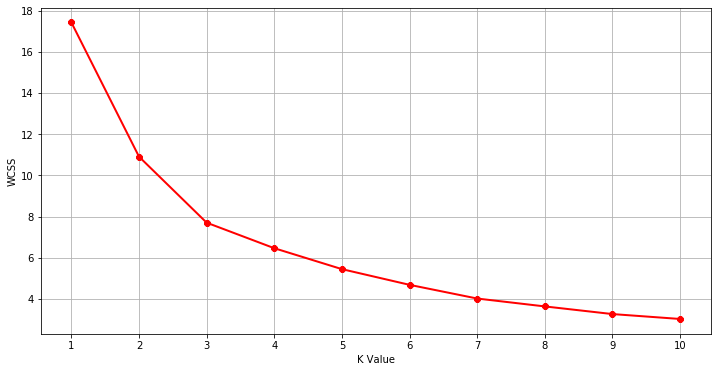

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(combined[['population total_norm','Median income_norm','Venue_norm']])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

C:\Users\dharnshah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


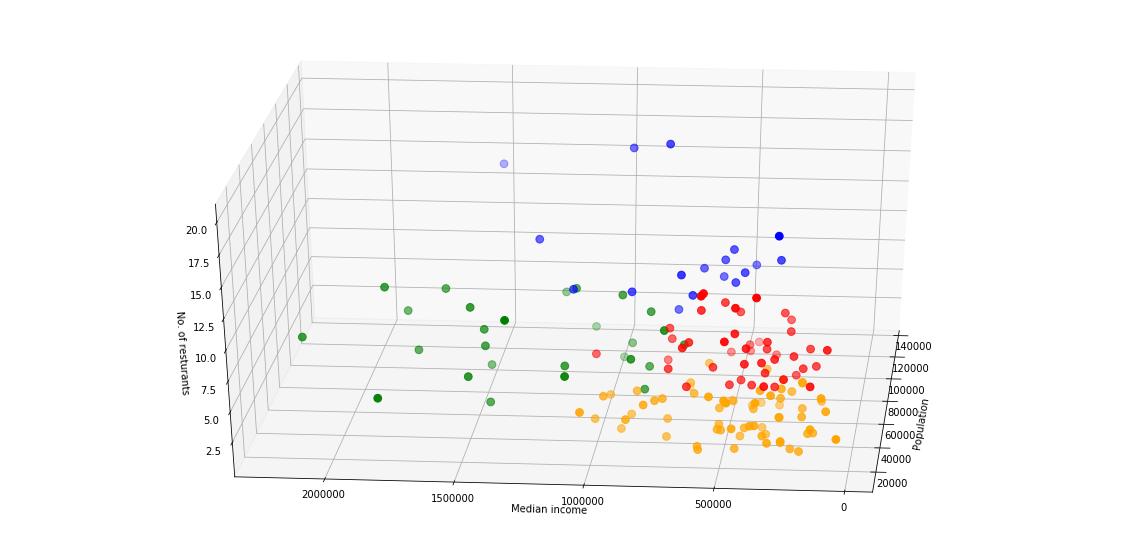

In [22]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(combined[['population total_norm','Median income_norm','Venue_norm']])
combined["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined["population total"][combined.label == 0], combined["Median income"][combined.label == 0],combined["Venue"][combined.label == 0], c='blue', s=60)
ax.scatter(combined["population total"][combined.label == 1], combined["Median income"][combined.label == 1],combined["Venue"][combined.label == 1], c='red', s=60)
ax.scatter(combined["population total"][combined.label == 2], combined["Median income"][combined.label == 2],combined["Venue"][combined.label == 2], c='green', s=60)
ax.scatter(combined["population total"][combined.label == 3], combined["Median income"][combined.label == 3],combined["Venue"][combined.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Population")
plt.ylabel("Median income")
ax.set_zlabel('No. of resturants')
plt.show()

In [23]:
centers = km.cluster_centers_
centers

array([[0.46476425, 0.3116756 , 0.61695906],
       [0.17032358, 0.17792647, 0.37871854],
       [0.46865763, 0.58303371, 0.21832359],
       [0.1654322 , 0.18989374, 0.10290652]])

In [24]:
combined.loc[combined["label"] == 0, 'cluster description'] = 'Very small population, low income, very less number of resturants' 
combined.loc[combined["label"] == 1, 'cluster description'] = 'Very large population, high income, very high number of resturants' 
combined.loc[combined["label"] == 2, 'cluster description'] = 'Small population, very low income, high number of resturants' 
combined.loc[combined["label"] == 3, 'cluster description'] = 'Large population, very high income, less number of resturants' 
combined

C:\Users\dharnshah\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\dharnshah\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Borough,Ncode,Neighborhood,Latitude,Longitude,population total,Median income,Median age,Venue,population total_norm,Median income_norm,Median age_norm,Venue_norm,label,cluster description
0,Brooklyn,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,48351,1520979,36.8,4.0,0.289098,0.686624,0.306667,0.157895,2,"Small population, very low income, high number..."
2,Brooklyn,BK61,Crown Heights North,40.670829,-73.943291,100130,980637,34.6,1.0,0.710422,0.434450,0.233333,0.000000,2,"Small population, very low income, high number..."
3,Brooklyn,BK90,East Williamsburg,40.708492,-73.938858,33155,519058,34.1,2.0,0.165449,0.219035,0.216667,0.052632,3,"Large population, very high income, less numbe..."
4,Queens,QN23,College Point,40.784903,-73.843045,24199,354073,38.7,8.0,0.092574,0.142037,0.370000,0.368421,1,"Very large population, high income, very high ..."
5,Staten Island,SI11,Charleston-Richmond Valley-Tottenville,40.530531,-74.232158,24083,342708,39.5,2.0,0.091630,0.136733,0.396667,0.052632,3,"Large population, very high income, less numbe..."
6,Queens,QN45,Douglas Manor-Douglaston-Little Neck,40.766846,-73.742498,25619,554014,45.4,5.0,0.104129,0.235348,0.593333,0.210526,3,"Large population, very high income, less numbe..."
7,Staten Island,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,40.538114,-74.178549,28727,521048,43.1,2.0,0.129418,0.219963,0.516667,0.052632,3,"Large population, very high income, less numbe..."
8,Staten Island,SI54,Great Kills,40.549480,-74.149324,43427,718593,43.2,8.0,0.249032,0.312156,0.520000,0.368421,1,"Very large population, high income, very high ..."
9,Bronx,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.819014,-73.848027,53800,490852,34.6,2.0,0.333436,0.205871,0.233333,0.052632,3,"Large population, very high income, less numbe..."
10,Queens,QN05,Rosedale,40.659816,-73.735261,28201,506307,40.7,2.0,0.125138,0.213084,0.436667,0.052632,3,"Large population, very high income, less numbe..."


In [50]:
uniqueValues = (combined['label'].append(combined['cluster description'])).unique()
print(uniqueValues)

[2 3 1 0 'Small population, very low income, high number of resturants'
 'Large population, very high income, less number of resturants'
 'Very large population, high income, very high number of resturants'
 'Very small population, low income, very less number of resturants']


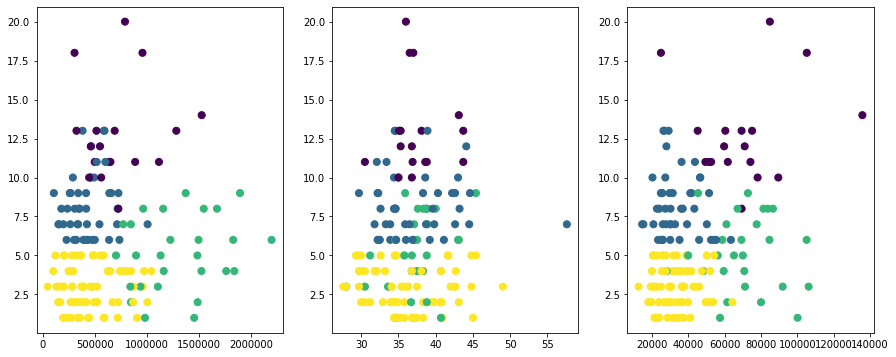

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.scatter(combined["Median income"], combined["Venue"], c=clusters, s=50, cmap='viridis')
plt.subplot(1,3,2)
plt.scatter(combined["Median age"], combined["Venue"], c=clusters, s=50, cmap='viridis')
plt.subplot(1,3,3)
plt.scatter(combined["population total"], combined["Venue"], c=clusters, s=50, cmap='viridis')
plt.show()


In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,description in zip(combined['Latitude'], combined['Longitude'], combined['Neighborhood'], combined['label'],combined['cluster description']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+" "+ 'Description: '+ str(description), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Analyze Each Neighborhood

In [27]:
# one hot encoding
resturants_onehot = pd.get_dummies(resturants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
resturants_onehot['Neighborhood'] = resturants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [resturants_onehot.columns[-1]] + list(resturants_onehot.columns[:-1])
resturants_onehot = resturants_onehot[fixed_columns]

resturants_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
5,Georgetown-Marine Park-Bergen Beach-Mill Basin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Georgetown-Marine Park-Bergen Beach-Mill Basin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Georgetown-Marine Park-Bergen Beach-Mill Basin,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,Georgetown-Marine Park-Bergen Beach-Mill Basin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60,Crown Heights North,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [28]:
resturants_onehot.shape

(943, 72)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [29]:
all_grouped = resturants_onehot.groupby('Neighborhood').mean().reset_index()
all_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Allerton-Pelham Gardens,0.000,0.0,0.250000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Annadale-Huguenot-Prince's Bay-Eltingville,0.000,0.0,0.500000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.500000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Astoria,0.000,0.0,0.076923,0.000000,0.000000,0.000000,0.000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.153846,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.076923,0.000000,0.000000,0.230769,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000
3,Auburndale,0.000,0.0,0.200000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Baisley Park,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### Let's confirm the new size

In [30]:
all_grouped.shape

(158, 72)

In [31]:
num_top_venues = 10

for hood in all_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = all_grouped[all_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton-Pelham Gardens----
                     venue  freq
0      American Restaurant  0.25
1       Italian Restaurant  0.25
2       Spanish Restaurant  0.25
3       Chinese Restaurant  0.25
4        Afghan Restaurant  0.00
5  New American Restaurant  0.00
6         Ramen Restaurant  0.00
7        Polish Restaurant  0.00
8      Peruvian Restaurant  0.00
9     Pakistani Restaurant  0.00


----Annadale-Huguenot-Prince's Bay-Eltingville----
                     venue  freq
0               Restaurant   0.5
1      American Restaurant   0.5
2      Moroccan Restaurant   0.0
3         Ramen Restaurant   0.0
4        Polish Restaurant   0.0
5      Peruvian Restaurant   0.0
6     Pakistani Restaurant   0.0
7        Paella Restaurant   0.0
8  New American Restaurant   0.0
9        Afghan Restaurant   0.0


----Astoria----
                           venue  freq
0             Seafood Restaurant  0.23
1      Middle Eastern Restaurant  0.15
2              Indian Restaurant  0.08
3            Am

9     Afghan Restaurant  0.00


----College Point----
                       venue  freq
0  Latin American Restaurant  0.25
1       Caribbean Restaurant  0.12
2         Chinese Restaurant  0.12
3         Seafood Restaurant  0.12
4           Asian Restaurant  0.12
5         Mexican Restaurant  0.12
6         Spanish Restaurant  0.12
7           Ramen Restaurant  0.00
8          Polish Restaurant  0.00
9        Peruvian Restaurant  0.00


----Corona----
                       venue  freq
0         Mexican Restaurant  0.33
1        Empanada Restaurant  0.17
2         Italian Restaurant  0.17
3  South American Restaurant  0.17
4                 Restaurant  0.17
5          Paella Restaurant  0.00
6           Ramen Restaurant  0.00
7          Polish Restaurant  0.00
8        Peruvian Restaurant  0.00
9       Pakistani Restaurant  0.00


----Crotona Park East----
                       venue  freq
0       Fast Food Restaurant  0.67
1  Latin American Restaurant  0.33
2          Afghan Restaura

9      Moroccan Restaurant   0.0


----Highbridge----
                       venue  freq
0         Chinese Restaurant  0.38
1  Latin American Restaurant  0.12
2         Seafood Restaurant  0.12
3         Mexican Restaurant  0.12
4       Fast Food Restaurant  0.12
5         Spanish Restaurant  0.12
6          Afghan Restaurant  0.00
7       Pakistani Restaurant  0.00
8          Polish Restaurant  0.00
9        Peruvian Restaurant  0.00


----Hollis----
                     venue  freq
0       Chinese Restaurant   1.0
1        Afghan Restaurant   0.0
2       Russian Restaurant   0.0
3         Ramen Restaurant   0.0
4        Polish Restaurant   0.0
5      Peruvian Restaurant   0.0
6     Pakistani Restaurant   0.0
7        Paella Restaurant   0.0
8  New American Restaurant   0.0
9      Moroccan Restaurant   0.0


----Homecrest----
                   venue  freq
0     Chinese Restaurant  0.22
1     Mexican Restaurant  0.22
2  Vietnamese Restaurant  0.11
3    American Restaurant  0.11
4     

9        Afghan Restaurant  0.00


----Old Astoria----
                           venue  freq
0             Seafood Restaurant  0.23
1      Middle Eastern Restaurant  0.15
2              Indian Restaurant  0.08
3            American Restaurant  0.08
4  Vegetarian / Vegan Restaurant  0.08
5             Falafel Restaurant  0.08
6       Mediterranean Restaurant  0.08
7           Brazilian Restaurant  0.08
8                     Restaurant  0.08
9               Greek Restaurant  0.08


----Old Town-Dongan Hills-South Beach----
                     venue  freq
0       Italian Restaurant  0.33
1      Japanese Restaurant  0.17
2  New American Restaurant  0.17
3       Mexican Restaurant  0.17
4       Chinese Restaurant  0.17
5         Ramen Restaurant  0.00
6        Polish Restaurant  0.00
7      Peruvian Restaurant  0.00
8     Pakistani Restaurant  0.00
9        Paella Restaurant  0.00


----Park Slope-Gowanus----
                     venue  freq
0       Italian Restaurant  0.33
1      America

                       venue  freq
0            Thai Restaurant  0.23
1        American Restaurant  0.23
2  Latin American Restaurant  0.15
3        Filipino Restaurant  0.08
4       Fast Food Restaurant  0.08
5         Chinese Restaurant  0.08
6        Japanese Restaurant  0.08
7           Arepa Restaurant  0.08
8         Tibetan Restaurant  0.00
9           Ramen Restaurant  0.00


----Yorkville----
                   venue  freq
0     Italian Restaurant  0.29
1  Vietnamese Restaurant  0.14
2       Asian Restaurant  0.14
3        Thai Restaurant  0.14
4      Indian Restaurant  0.14
5       Sushi Restaurant  0.14
6    Moroccan Restaurant  0.00
7      Polish Restaurant  0.00
8    Peruvian Restaurant  0.00
9   Pakistani Restaurant  0.00




#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = all_grouped['Neighborhood']

for ind in np.arange(all_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton-Pelham Gardens,Spanish Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Vietnamese Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
1,Annadale-Huguenot-Prince's Bay-Eltingville,Restaurant,American Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
2,Astoria,Seafood Restaurant,Middle Eastern Restaurant,Indian Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Greek Restaurant,Brazilian Restaurant,Mediterranean Restaurant,Falafel Restaurant
3,Auburndale,Italian Restaurant,Korean Restaurant,Fast Food Restaurant,Sushi Restaurant,American Restaurant,Indian Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Greek Restaurant,Dumpling Restaurant
4,Baisley Park,Italian Restaurant,Indian Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Greek Restaurant,German Restaurant,Dim Sum Restaurant


## 5. Clustering according to the type of resturants


In [34]:
# set number of clusters
kclusters = 5

NY_grouped_clustering = all_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NY_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 4, 4, 4, 4, 1, 4, 4, 1])

In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NY_merged = NY_data
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NY_merged = NY_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
NY_merged=NY_merged.dropna()
NY_merged.head() # check the last columns!


,Borough,Ncode,Neighborhood,Latitude,Longitude,population total,Median income,Median age,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.623845,-73.916075,48351,1520979,36.8,4.0,Japanese Restaurant,American Restaurant,Mexican Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Greek Restaurant,German Restaurant
2,Brooklyn,BK61,Crown Heights North,40.670829,-73.943291,100130,980637,34.6,4.0,Sushi Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Vietnamese Restaurant
3,Brooklyn,BK90,East Williamsburg,40.708492,-73.938858,33155,519058,34.1,4.0,Vegetarian / Vegan Restaurant,Taiwanese Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
4,Queens,QN23,College Point,40.784903,-73.843045,24199,354073,38.7,1.0,Latin American Restaurant,Mexican Restaurant,Caribbean Restaurant,Asian Restaurant,Seafood Restaurant,Chinese Restaurant,Spanish Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
5,Staten Island,SI11,Charleston-Richmond Valley-Tottenville,40.530531,-74.232158,24083,342708,39.5,4.0,Japanese Restaurant,American Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant


## 6. Examine Clusters


#### Cluster 1

In [41]:
NY_merged.loc[NY_merged['Cluster Labels'] == 0, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Ncode,population total,Median income,Median age,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,QN12,35500,338136,34.9,0.0,Fast Food Restaurant,Vietnamese Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,French Restaurant,Dim Sum Restaurant
23,BK82,91956,936755,33.6,0.0,Fast Food Restaurant,Caribbean Restaurant,Spanish Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
39,BX17,41871,248589,29.7,0.0,Restaurant,Spanish Restaurant,Paella Restaurant,Fast Food Restaurant,Hawaiian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Czech Restaurant
43,BK83,47526,648452,33.2,0.0,Fast Food Restaurant,Cuban Restaurant,Latin American Restaurant,South American Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
45,BX33,25542,102323,30.5,0.0,Fast Food Restaurant,Latin American Restaurant,Chinese Restaurant,Vietnamese Restaurant,Filipino Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,French Restaurant
46,BK88,106203,1103775,28.0,0.0,Restaurant,American Restaurant,Fast Food Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,French Restaurant
53,BK85,29854,283190,34.1,0.0,Fast Food Restaurant,Caribbean Restaurant,Spanish Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
60,QN44,22427,372525,49.0,0.0,Middle Eastern Restaurant,Indian Restaurant,Fast Food Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Vietnamese Restaurant
94,QN35,38449,623856,38.3,0.0,Sushi Restaurant,Indian Restaurant,Mexican Restaurant,Fast Food Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
101,BX03,36676,390639,36.0,0.0,Fast Food Restaurant,Spanish Restaurant,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant


#### Cluster 2

In [42]:
NY_merged.loc[NY_merged['Cluster Labels'] == 1, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Ncode,population total,Median income,Median age,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,QN23,24199,354073,38.7,1.0,Latin American Restaurant,Mexican Restaurant,Caribbean Restaurant,Asian Restaurant,Seafood Restaurant,Chinese Restaurant,Spanish Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
9,BX09,53800,490852,34.6,1.0,Latin American Restaurant,Southern / Soul Food Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
12,BX27,27562,149520,30.5,1.0,Restaurant,Spanish Restaurant,Czech Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
20,MN25,37506,904097,35.8,1.0,Mexican Restaurant,Vietnamese Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
26,SI07,24202,592003,40.9,1.0,Spanish Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
30,BK25,41899,726502,40.3,1.0,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,American Restaurant,Russian Restaurant,Asian Restaurant,Sushi Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
35,BX07,33728,282549,35.8,1.0,Italian Restaurant,Spanish Restaurant,Chinese Restaurant,Mexican Restaurant,Eastern European Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
36,BX40,26336,122945,30.0,1.0,Latin American Restaurant,Spanish Restaurant,African Restaurant,Chinese Restaurant,Vietnamese Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
37,QN25,54091,500159,36.0,1.0,Mexican Restaurant,Restaurant,South American Restaurant,Empanada Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Indian Restaurant,Hotpot Restaurant,Hawaiian Restaurant
40,BK64,20449,493713,34.4,1.0,Mexican Restaurant,Latin American Restaurant,Caribbean Restaurant,New American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Sushi Restaurant,Cajun / Creole Restaurant,English Restaurant


#### Cluster 3

In [43]:
NY_merged.loc[NY_merged['Cluster Labels'] == 2, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Ncode,population total,Median income,Median age,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,QN27,23070,446564,36.8,2.0,Caribbean Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
51,BX44,61503,845829,36.7,2.0,Caribbean Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
55,QN33,20212,1041587,40.7,2.0,Caribbean Restaurant,Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
72,QN01,36864,723238,34.9,2.0,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
111,QN66,25141,871570,42.0,2.0,Caribbean Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
130,BK91,52657,1114112,38.8,2.0,Caribbean Restaurant,Latin American Restaurant,Restaurant,Spanish Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
139,BK95,29933,285001,35.4,2.0,Caribbean Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


#### Cluster 4

In [44]:
NY_merged.loc[NY_merged['Cluster Labels'] == 3, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Ncode,population total,Median income,Median age,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,QN05,28201,506307,40.7,3.0,Chinese Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
14,QN15,50294,354594,35.7,3.0,Chinese Restaurant,Caribbean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
17,QN02,26959,169006,39.8,3.0,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
21,BK93,12822,49725,34.1,3.0,American Restaurant,Chinese Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Filipino Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
41,SI05,39517,846652,40.7,3.0,Chinese Restaurant,Restaurant,Mexican Restaurant,Fast Food Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
47,BK96,56277,895192,38.8,3.0,Caribbean Restaurant,Fast Food Restaurant,Seafood Restaurant,Chinese Restaurant,Vietnamese Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
59,QN07,21520,586063,37.4,3.0,Chinese Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
63,BX55,35886,286087,32.1,3.0,Chinese Restaurant,Latin American Restaurant,Vietnamese Restaurant,Filipino Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
77,BX13,44304,132948,42.6,3.0,Restaurant,Chinese Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
89,BX01,30715,197591,27.6,3.0,Restaurant,Chinese Restaurant,Caribbean Restaurant,Fast Food Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant


#### Cluster 5

In [45]:
NY_merged.loc[NY_merged['Cluster Labels'] == 4, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Ncode,population total,Median income,Median age,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BK45,48351,1520979,36.8,4.0,Japanese Restaurant,American Restaurant,Mexican Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Greek Restaurant,German Restaurant
2,BK61,100130,980637,34.6,4.0,Sushi Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Vietnamese Restaurant
3,BK90,33155,519058,34.1,4.0,Vegetarian / Vegan Restaurant,Taiwanese Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
5,SI11,24083,342708,39.5,4.0,Japanese Restaurant,American Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
6,QN45,25619,554014,45.4,4.0,Italian Restaurant,Fast Food Restaurant,Thai Restaurant,Chinese Restaurant,Greek Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
7,SI01,28727,521048,43.1,4.0,Restaurant,American Restaurant,Filipino Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
8,SI54,43427,718593,43.2,4.0,Italian Restaurant,Spanish Restaurant,Mexican Restaurant,Falafel Restaurant,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Empanada Restaurant,Indonesian Restaurant,Indian Restaurant
11,BX10,26139,340905,42.6,4.0,Italian Restaurant,Mexican Restaurant,Thai Restaurant,Asian Restaurant,Fast Food Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
15,BX52,46104,958549,42.6,4.0,Italian Restaurant,American Restaurant,Asian Restaurant,Vietnamese Restaurant,Filipino Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
18,BK23,15472,158958,57.6,4.0,Italian Restaurant,German Restaurant,Fast Food Restaurant,Japanese Restaurant,American Restaurant,Mexican Restaurant,Indian Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Greek Restaurant


## Conclusion

In this project, I analyzed cluster 3 would be the best option from which the neighborhoods for a new restaurant should be selected. Depending on the budget and size of population the owner plans to serve, other clusters can be investigated. The clusters can be made non-overlapping with more demographics, accessibility of the location and competitors’ data.